In [3]:
#! /usr/bin/env python
# -*- coding: UTF8 -*-
# Este arquivo é parte do programa FonoComp
# Copyright 2013-2019 Carlo Oliveira <carlo@nce.ufrj.br>,
# `Labase <http://labase.selfip.org/>`__; `GPL <http://is.gd/3Udt>`__.
#
# FonoComp é um software livre; você pode redistribuí-lo e/ou
# modificá-lo dentro dos termos da Licença Pública Geral GNU como
# publicada pela Fundação do Software Livre (FSF); na versão 2 da
# Licença.
#
# Este programa é distribuído na esperança de que possa ser  útil,
# mas SEM NENHUMA GARANTIA; sem uma garantia implícita de ADEQUAÇÃO
#  a qualquer MERCADO ou APLICAÇÃO EM PARTICULAR. Veja a
# Licença Pública Geral GNU para maiores detalhes.
#
# Você deve ter recebido uma cópia da Licença Pública Geral GNU
# junto com este programa, se não, escreva para a Fundação do Software
# Livre(FSF) Inc., 51 Franklin St, Fifth Floor, Boston, MA  02110-1301  USA

"""
############################################################
FonoComp - Data Source
############################################################

Conecta com a fonte dos dados, neste caso a API do Github.

"""
import datetime
import os.path
import os as op
from github import Github
from base64 import decodebytes as dcd
from matplotlib import pyplot as plt
from datetime import datetime as dt , timedelta as td
import matplotlib.cm as cm

#TIMESTAMP = '@{:%Y-%m-%d %H:%M}'
TIMESTAMP = ':%Y-%m-%d %H'
#PASSWORD = dcd(str.encode(op.environ["IKW"])).decode("utf-8")
#TOKEN = dcd(str.encode(op.environ["IKT"])).decode("utf-8")
TOKEN = dcd(str.encode("MjA5ZWZhNzhhOWFlNGQ4NDU0MzBkYzc2MTIyOGU3NDU4NmM3MzY4YQ==\n")).decode("utf-8")


class DataSource:
    def __init__(self):
        g = Github(TOKEN)
        self.user = g.get_user("kwarwp")
        self.repo = None
        self.module = {}
        self.times = {}

    def get_file_branched(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        self.repo.get_branches()
        ref = self.repo.get_branch(packager).commit.sha
        return self.repo.get_file_contents("{}/{}".format(packager, moduler), ref)

    def get_file_contents(self, project, packager, moduler="main.py"):
        self.repo = self.user.get_repo(project)
        path = "{}/{}" if packager else "{}{}"
        print("get_file_contents ", project, path.format(packager, moduler))
        return self.repo.get_file_contents(path.format(packager, moduler))

    def get_commits(self, project):
        self.repo = self.user.get_repo(project)
        return self.repo.get_commits()

    def compute_times(self, project):
        def assign_modules_each_time(time, module):
            modules = self.times[time].setdefault(module, 0) + 1
            self.times[time].update({module: modules})
            try:
                pass
            except:
                pass
        modules = sorted(self.module.keys())
        [assign_modules_each_time(time, module) for module, times in self.module.items() for time in times ]
        self.times = [(time,[self.times[time].setdefault(module, 0)
                             for module in modules])
                      for time in sorted(self.times.keys())]
        return modules, self.times

    def compute_commits(self, project):
        def assign_module_and_time(time, module):
            module = module.split("/")[0].split()[1]
            time = datetime.datetime(time.year, time.month, time.day, time.hour)
            times = self.module.setdefault(module, [])
            times.append(time)
            self.module.update({module: times})
            self.times[time] = {}
            try:
                pass
            except:
                pass
        cs = self.get_commits(project)[0:1800]
        [assign_module_and_time(cm.commit.author.date, cm.commit.message)
         for cm in cs if "main.py" in cm.commit.message]
        return self.module

    def barplot(self, md, ct, factor=40.):
        x, y = zip(*ct)

        title, label = "Número de commits no github por dia", "commits"
        # print("plot_stats", x, xticks, y, self.games)
        fig = plt.figure(figsize=(16,6))
        plt.xticks(rotation=90)    
        #plt.xticks(x, xticks)
        fig.suptitle(title)
        plt.ylabel(label)
        plt.ylim(1, 22)
        yy = zip(*y)
        for dy, (l, y) in enumerate(zip(md, yy)):
            #bar(x,y)
            x = [xx+td(hours=dy) for xx in x]
            _ = plt.bar(x, y,2.8,1, label=l, color=cm.coolwarm(dy/factor, 2))
        plt.legend(ncol=6)
        _ = plt.show()

DS = DataSource()


In [4]:
cs=DS.compute_commits("vera")
_ = [(print(module, len(date), date[0:2])) for module, date in cs.items()]

cobra 6 [datetime.datetime(2019, 7, 4, 15, 0), datetime.datetime(2019, 7, 4, 14, 0)]
rachel 57 [datetime.datetime(2019, 7, 4, 14, 0), datetime.datetime(2019, 7, 4, 14, 0)]
caverna 1 [datetime.datetime(2019, 7, 4, 14, 0)]
morgan 51 [datetime.datetime(2019, 7, 4, 13, 0), datetime.datetime(2019, 7, 4, 13, 0)]
amanda 31 [datetime.datetime(2019, 6, 27, 15, 0), datetime.datetime(2019, 6, 27, 15, 0)]
perigo1 14 [datetime.datetime(2019, 6, 27, 15, 0), datetime.datetime(2019, 6, 27, 14, 0)]
mar 15 [datetime.datetime(2019, 6, 27, 13, 0), datetime.datetime(2019, 6, 27, 12, 0)]
fundodomar 2 [datetime.datetime(2019, 6, 27, 13, 0), datetime.datetime(2019, 6, 27, 13, 0)]
samantha 20 [datetime.datetime(2019, 6, 15, 5, 0), datetime.datetime(2019, 6, 15, 5, 0)]
mapa 11 [datetime.datetime(2019, 6, 13, 21, 0), datetime.datetime(2019, 6, 13, 21, 0)]
elemento 9 [datetime.datetime(2019, 6, 13, 14, 0), datetime.datetime(2019, 6, 13, 14, 0)]
julia 106 [datetime.datetime(2019, 6, 13, 14, 0), datetime.datetime(2

In [5]:
md, ct=DS.compute_times("vera")
# keys = list(ct.keys())
#_ = [(print(time, len(ct[time]), ct[time])) for time in sorted(keys)]
_ = [(print(time, len(module), module)) for time, module in ct]
#_ = [(print(time, len(ct[time]), ct[time])) for time in sorted(keys)]

2018-09-06 00:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
2018-09-06 10:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2018-09-06 11:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2018-09-12 14:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2018-09-13 07:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
2018-09-13 11:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 0, 0, 0]
2018-09-18 18:00:00 40 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

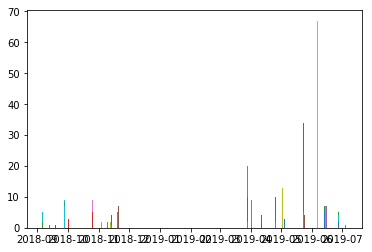

In [6]:
from pylab import plot, bar
x, y = zip(*ct)
yy = zip(*y)
for y in yy:
    bar(x,y)

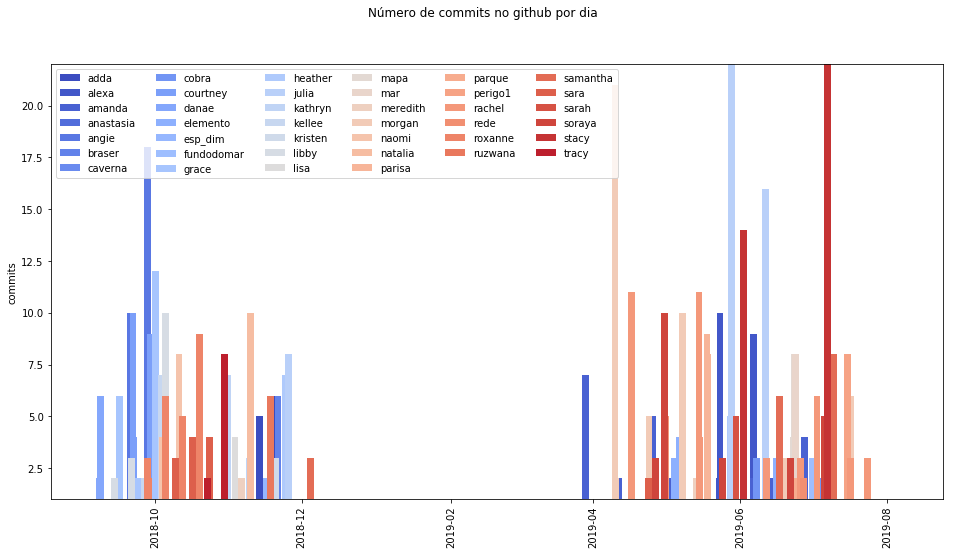

In [7]:
from matplotlib import pyplot as plt
from datetime import datetime as dt , timedelta as td
import matplotlib.cm as cm
x, y = zip(*ct)

title, label = "Número de commits no github por dia", "commits"
# print("plot_stats", x, xticks, y, self.games)
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation=90)    
#plt.xticks(x, xticks)
fig.suptitle(title)
plt.ylabel(label)
plt.ylim(1, 22)
yy = zip(*y)
for dy, (l, y) in enumerate(zip(md, yy)):
    #bar(x,y)
    x = [xx+td(hours=dy) for xx in x]
    _ = plt.bar(x, y,2.8,1, label=l, color=cm.coolwarm(dy/40., 2))
plt.legend(ncol=6)
_ = plt.show()


In [9]:
cs=DS.compute_commits("henrietta")
md, ct=DS.compute_times("henrietta")
DS.barplot(md, ct)


TypeError: list indices must be integers or slices, not datetime.datetime